# 確認 **Tensorflow** 使用 **GPU** 進行運算

In [1]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8233500744386945323
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1492117094
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11515845169002922151
physical_device_desc: "device: 0, name: GeForce 840M, pci bus id: 0000:04:00.0, compute capability: 5.0"
]


In [4]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

# 載入所需套件

In [5]:
import os
from natsort import natsorted, ns
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
import csv

# 取得圖片資料

In [3]:
def get_data(data_folder):
    img_list = os.listdir(data_folder)
    img_list = [os.path.join(data_folder, img) for img in img_list]
    img_list = natsorted(img_list, alg=ns.IGNORECASE)
    
    img_arr = []
    for img in img_list:
        image = Image.open(img)
        image = image.convert('L')
        image = np.array(image)
        img_arr.append(image.tolist())

    img_arr = np.array(img_arr)
    
    data = img_arr.reshape(img_arr.shape[0], 50, 100, 1).astype('float32')
    data /= 255
    return data

# 取得標註資料

In [7]:
def get_labels(label_file):
    y_onehot = []
    with open(label_file) as csvfile:
        content = csv.reader(csvfile)
        for row in content:
            onehot = []
            for i, char in enumerate(row[0]):
                each_dight = [0] * 10
                each_dight[int(char)] = 1
                onehot.append(each_dight)
            y_onehot.append(onehot)

    y_Train_1 = np.array([y[0] for y in y_onehot])
    y_Train_2 = np.array([y[1] for y in y_onehot])
    y_Train_3 = np.array([y[2] for y in y_onehot])
    y_Train_4 = np.array([y[3] for y in y_onehot])
    y_Train = [y_Train_1, y_Train_2, y_Train_3, y_Train_4]
    return y_Train

# 載入訓練資料及標籤

In [8]:
def load_data(data_folder, label_file):
    return get_data(data_folder), get_labels(label_file)

In [9]:
training_data = 'C:\\Users\\USER\\Desktop\\Auto Bank\\hua_nan\\training_images'
training_labels = 'C:\\Users\\USER\\Desktop\\Auto Bank\\hua_nan\\training_labels.csv'
x_Train, y_Train = load_data(training_data, training_labels)
print('訓練資料:', x_Train.shape)
print('訓練標籤:', len(y_Train), '個 array')

訓練資料: (2000, 50, 100, 1)
訓練標籤: 4 個 array


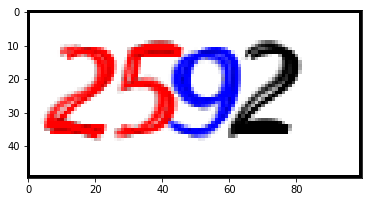

In [10]:
image = Image.open('hua_nan\\training_images\\1234.png')
imshow(image)

# 建立模型

In [11]:
from keras.models import Model, load_model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [12]:
main_input = Input(shape=(50, 100, 1))

In [13]:
conv1 = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(main_input)

In [14]:
conv2 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(conv1)

In [15]:
pool1 = MaxPool2D(pool_size=(2, 2))(conv2)

In [16]:
conv3 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(pool1)

In [17]:
conv4 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(conv3)

In [18]:
pool2 = MaxPool2D(pool_size=(2, 2))(conv4)

In [19]:
conv5 = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(pool2)

In [20]:
conv6 = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(conv5)

In [21]:
pool3 = MaxPool2D(pool_size=(2, 2))(conv6)

In [22]:
conv7 = Conv2D(filters=256, kernel_size=(3, 3), activation='relu')(pool3)

In [23]:
pool4 = MaxPool2D(pool_size=(2, 2))(conv7)

In [24]:
flat1 = Flatten()(pool4)

In [25]:
drop1 = Dropout(0.5)(flat1)

In [26]:
output = [Dense(10, activation='softmax', name='output' + str(i + 1))(drop1) for i in range(4)]

In [27]:
model = Model(inputs=main_input, outputs=output)

In [28]:
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50, 100, 1)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 50, 100, 32)  320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 48, 98, 32)   9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 24, 49, 32)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

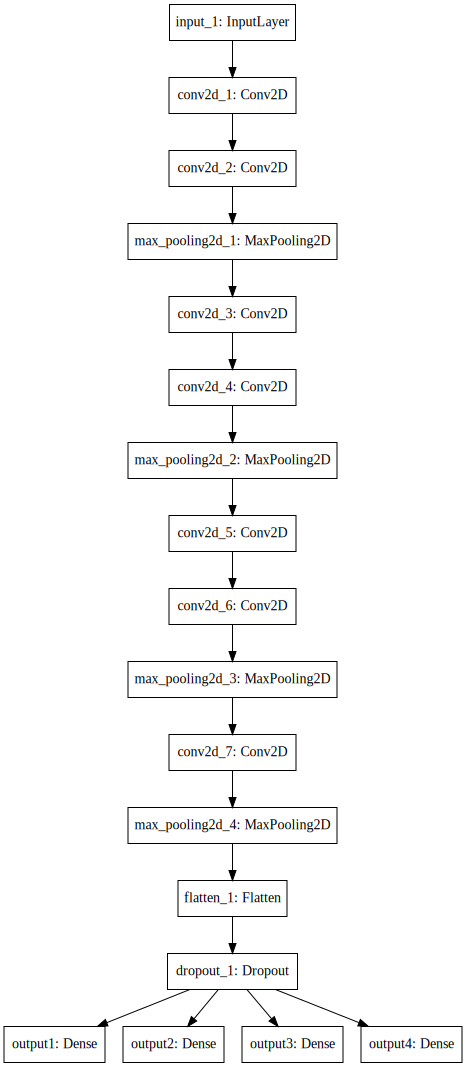

In [29]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 開始訓練

In [31]:
train_history = model.fit(x=x_Train, y=y_Train, validation_split=0.2, epochs=10, batch_size=100, verbose=2)

Train on 1600 samples, validate on 400 samples
Epoch 1/10
 - 20s - loss: 9.2153 - output1_loss: 2.3042 - output2_loss: 2.3025 - output3_loss: 2.3039 - output4_loss: 2.3047 - output1_acc: 0.0988 - output2_acc: 0.0987 - output3_acc: 0.0900 - output4_acc: 0.0962 - val_loss: 9.2082 - val_output1_loss: 2.3017 - val_output2_loss: 2.3019 - val_output3_loss: 2.3025 - val_output4_loss: 2.3020 - val_output1_acc: 0.0800 - val_output2_acc: 0.1200 - val_output3_acc: 0.0900 - val_output4_acc: 0.1150
Epoch 2/10
 - 13s - loss: 9.2072 - output1_loss: 2.3013 - output2_loss: 2.3012 - output3_loss: 2.3019 - output4_loss: 2.3027 - output1_acc: 0.1031 - output2_acc: 0.1138 - output3_acc: 0.1044 - output4_acc: 0.1100 - val_loss: 9.1879 - val_output1_loss: 2.2994 - val_output2_loss: 2.2958 - val_output3_loss: 2.2976 - val_output4_loss: 2.2951 - val_output1_acc: 0.0800 - val_output2_acc: 0.1600 - val_output3_acc: 0.1225 - val_output4_acc: 0.1150
Epoch 3/10
 - 17s - loss: 9.0485 - output1_loss: 2.2904 - output2

In [32]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# 訓練過程準確率的變化

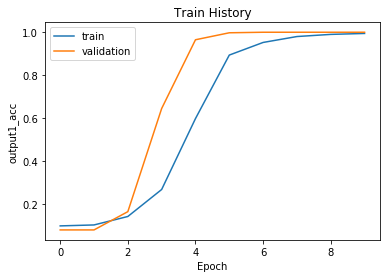

In [33]:
show_train_history(train_history, 'output1_acc', 'val_output1_acc')

# 儲存模型

In [34]:
model.save('Models\\Captcha_Model_002.h5')

# 分別將模型儲存成 **json** 檔與權重檔

In [35]:
from keras.models import model_from_json
import json
json_string = model.to_json()
with open('Models\\Captcha_Model_002.json', 'w') as outfile:
    json.dump(json_string, outfile)
    
model.save_weights('Models\\Captcha_Model_Weight_002.h5')